<H1>Linguistic Word Frequency</h1>
Can I filter OCRed documents by linguistic frequency? I'm going to try [the wordfreq](https://pypi.org/project/wordfreq/) library.

In [126]:
from wordfreq import tokenize, word_frequency, zipf_frequency
import gensim, os, spacy
import pandas as pd
# from textstat.textstat import textstatistics,legacy_round
ecws = spacy.load('en_core_web_sm')
from utils.dataclean import dataclean
from utils.pickle_it import pickle_it
from utils.whoopsie import whoopsie
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
def word_freqs(toks, type="raw"):
	freqs = []
	for tok in toks:
		if type=="raw":
			freqs.append(word_frequency(tok, 'en'))
		elif type=="zipf":
			freqs.append(zipf_frequency(tok, 'en'))
		else:
			raise Exception("Frequency type must be'raw' or 'zipf'.")
	return freqs

In [6]:
with open("docs/2018_txt_dump/104-10012-10037.txt", encoding="UTF-8") as f:
    good_doc = f.read()
print(good_doc[:100])


4

LEE HARVEY OSWALD

Union organization in Tulsa for 11 years and this form became
obsolete sometim


In [8]:
with open("docs/2018_txt_dump/104-10003-10204.txt", encoding="UTF-8") as f:
    bad_doc = f.read()
print(bad_doc[:100])


 

 

 

 

 

 

 

 

 

 

 

 

INTERNAL D
sez GVO “tormens* 5} SECRET ©] CONFIDENTIAL §=(-] {TE


In [35]:
good_doc_toks = tokenize(good_doc, 'en')
bad_doc_toks = tokenize(bad_doc, 'en')
good_doc_freqs = word_freqs(good_doc_toks)
bad_doc_freqs = word_freqs(bad_doc_toks)
good_doc_idx = sum(good_doc_freqs) / len(good_doc_toks)
bad_doc_idx = sum(bad_doc_freqs) / len(bad_doc_toks)
print(f"Good Doc: {good_doc_idx}, Bad Doc: {bad_doc_idx}")

Good Doc: 0.004674258158605799, Bad Doc: 0.00013460253076923078


In [100]:
tokenize("§=(-]", 'en')

[]

In [86]:
tokenize("nyqub", 'en')

['nyqub']

In [87]:
word_frequency('nyqub', 'en')

0.0

In [88]:
zipf_frequency('nyqub', 'en')

0.0

In [36]:
for i in range(0, len(bad_doc_toks)):
    print(f"{bad_doc_toks[i]}, {bad_doc_freqs[i]}")

internal, 4.57e-05
d, 0.000288
sez, 3.72e-07
gvo, 2.09e-08
tormens, 0.0
5, 0.000562
secret, 8.32e-05
©, 1.86e-05
confidential, 7.94e-06
ternal, 0.0
6, 0.000389
7, 0.000355
unclassifie, 0.0


In [9]:
good_doc_toks = tokenize(good_doc, 'en')
bad_doc_toks = tokenize(bad_doc, 'en')
good_doc_freqs = word_freqs(good_doc_toks, type="zipf")
bad_doc_freqs = word_freqs(bad_doc_toks, type="zipf")
good_doc_idx = sum(good_doc_freqs) / len(good_doc_toks)
bad_doc_idx = sum(bad_doc_freqs) / len(bad_doc_toks)
print(f"Good Doc: {good_doc_idx}, Bad Doc: {bad_doc_idx}")

Good Doc: 5.271048735348559, Bad Doc: 3.3838461538461533


In [110]:
doc_freqs = pd.DataFrame(columns=["Doc", "Text", "Tokens", "Length", "Freqs, Raw", "Freqs, Zipf", "Freq_Idx_Raw", "Freq_Idx_Zipf", "Exclude"])
# doc_freqs = pd.DataFrame()

files = os.listdir("Corpus")

for i in range(0, len(files)):
    try:
        doc_name = files[i][:-4]
        with open("Corpus" + "/" + files[i], encoding="UTF-8") as f:
            text = f.read()
        toks = tokenize(text, 'en')
        length = len(toks)
        if length == 0:
            exclude = True
            raw_freqs = None
            zipf_freqs = None
            doc_freqs_raw = None
            doc_freqs_zipf = None
        elif length > 0:
            exclude = False
            raw_freqs = word_freqs(toks)
            zipf_freqs = word_freqs(toks, type="zipf")
            doc_freqs_raw = sum(raw_freqs) / len(toks)
            doc_freqs_zipf = sum(zipf_freqs) / len(toks)
    except Exception as exc:
        whoopsie(str(exc))

    try:
        # doc_freqs = pd.concat([doc_freqs, pd.Series(data={"Doc":doc_name, "Text":text, "Tokens":toks, "Freqs, Raw":raw_freqs, \
        #     "Freqs, Zipf":zipf_freqs, "Freq_Idx_Raw":doc_freqs_raw, "Freq_Idx_Zipf":doc_freqs_zipf}, name=i)], axis=0)
        doc_freqs.loc[len(doc_freqs)] = pd.Series(data={"Doc":doc_name, "Text":text, "Tokens":toks, "Length":length, "Freqs, Raw":raw_freqs, \
            "Freqs, Zipf":zipf_freqs, "Freq_Idx_Raw":doc_freqs_raw, "Freq_Idx_Zipf":doc_freqs_zipf, "Exclude":exclude}, name=i)
    except Exception as exc:
        whoopsie(str(exc))

    if i % 1000 == 0:
        print(f"Computed frequency for {i} documents.")

pickle_it(doc_freqs, "doc_freqs.pkl")

Computed frequency for 0 documents.
Computed frequency for 1000 documents.
Computed frequency for 2000 documents.
Computed frequency for 3000 documents.
Computed frequency for 4000 documents.
Computed frequency for 5000 documents.
Computed frequency for 6000 documents.
Computed frequency for 7000 documents.
Computed frequency for 8000 documents.
Computed frequency for 9000 documents.
Computed frequency for 10000 documents.
Computed frequency for 11000 documents.
Computed frequency for 12000 documents.
Computed frequency for 13000 documents.
Computed frequency for 14000 documents.
Computed frequency for 15000 documents.
Computed frequency for 16000 documents.


In [102]:
doc_freqs.shape

(16829, 9)

In [75]:
files[0]

'104-10001-10008.txt'

In [105]:
doc_freqs.head

<bound method NDFrame.head of                    Doc                                               Text  \
0      104-10001-10008  104-10001-10008\n\nce .. MAAR 22416\n. 5 . . B...   
1      104-10001-10015  13-00000 ©\n\ng- 1963: Acearding to an extreme...   
2      104-10001-10034  13-00000\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\...   
3      104-10001-10035   \n\n \n\n3, For your information, the above p...   
4      104-10001-10042   \n\nAGENCY\n\nRECORD NUMBER\nRECORD SERIES\nA...   
...                ...                                                ...   
16824   docid_32328451  CG 92-374\n\nIn 1934, LEONARD PATRICK was at a...   
16825   docid_32328743  Office of Origin\n\nNSW ORLEANS:\n\n \n\n«\n\n...   
16826   docid_32328757  Re~ort Porm\n\n \n\n \n\n \n\n \n\n \n\n \n\nF...   
16827   docid_32328769  NY ad\n\nLR 162-8\n\nOn April 20, 1961, T-9 ad...   
16828   docid_32576099  NW 45839\n\nAL 92-553\n\nMORRISON, several oth...   

                                             

In [111]:
doc_freqs.loc[doc_freqs['Exclude']==True][:3]

,Doc,Text,Tokens,Length,"Freqs, Raw","Freqs, Zipf",Freq_Idx_Raw,Freq_Idx_Zipf,Exclude
10,104-10003-10071,\n,[],0,None,None,None,None,True
511,104-10064-10022,,[],0,None,None,None,None,True
639,104-10069-10325,\n\n \n\n \n\n \n,[],0,None,None,None,None,True


In [116]:
df_filtered = doc_freqs.loc[doc_freqs['Exclude']==False]
df_filtered.shape

(16795, 9)

In [73]:
print(min(doc_freqs["Freq_Idx_Raw"]), max(doc_freqs["Freq_Idx_Raw"]))

0.003816258520744673 0.003816258520744673


(array([1.180e+02, 1.740e+02, 5.890e+02, 1.368e+03, 1.960e+03, 1.952e+03,
        1.896e+03, 1.731e+03, 1.647e+03, 1.538e+03, 1.276e+03, 1.039e+03,
        6.610e+02, 4.470e+02, 2.190e+02, 1.140e+02, 4.700e+01, 1.300e+01,
        3.000e+00, 2.000e+00, 1.000e+00]),
 array([0.0, 0.0005495028634920634, 0.0010990057269841269,
        0.0016485085904761904, 0.0021980114539682538, 0.002747514317460317,
        0.003297017180952381, 0.003846520044444444, 0.0043960229079365075,
        0.004945525771428571, 0.005495028634920634, 0.006044531498412698,
        0.006594034361904762, 0.007143537225396825, 0.007693040088888888,
        0.008242542952380952, 0.008792045815873015, 0.009341548679365078,
        0.009891051542857143, 0.010440554406349205, 0.010990057269841268,
        0.011539560133333333], dtype=object),
 <BarContainer object of 21 artists>)

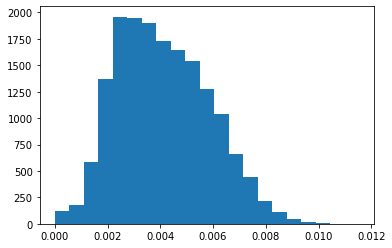

In [114]:
plt.hist(df_filtered["Freq_Idx_Raw"], bins=21)

(array([3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        6.000e+00, 1.600e+01, 4.600e+01, 1.650e+02, 4.570e+02, 9.460e+02,
        1.464e+03, 1.991e+03, 3.738e+03, 5.167e+03, 2.437e+03, 3.460e+02,
        6.000e+00, 0.000e+00, 2.000e+00]),
 array([0.0, 0.32571428571428573, 0.6514285714285715, 0.9771428571428572,
        1.302857142857143, 1.6285714285714286, 1.9542857142857144,
        2.2800000000000002, 2.605714285714286, 2.9314285714285715,
        3.257142857142857, 3.582857142857143, 3.908571428571429,
        4.234285714285715, 4.5600000000000005, 4.885714285714286,
        5.211428571428572, 5.537142857142857, 5.862857142857143,
        6.188571428571429, 6.514285714285714, 6.84], dtype=object),
 <BarContainer object of 21 artists>)

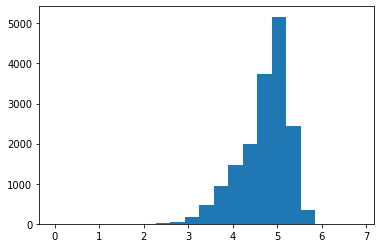

In [115]:
plt.hist(df_filtered["Freq_Idx_Zipf"], bins=21)

In [120]:
trimmed_dist = stats.trim1(df_filtered["Freq_Idx_Zipf"].values, 0.33, tail='left')
min(trimmed_dist)

4.613064516129029

In [121]:
crit = min(stats.trim1(df_filtered["Freq_Idx_Zipf"].values, 0.33, tail='left'))
df_filtered2 = df_filtered.loc[df_filtered["Freq_Idx_Zipf"] > crit]
df_filtered2.shape

(11252, 9)

In [122]:
pickle_it(df_filtered2, "df_filtered2.pkl")

In [129]:
# Read a Document from a filename, tagging each document w a supplied tag list
corpus = []
for index, row in df_filtered2.iterrows():
    # send that through the datacleaner & tokenize it
    tokens = gensim.utils.simple_preprocess(dataclean(row['Text']))
    # For training data, add a list of tags, such as, say, the name of the document 
    corpus.append(gensim.models.doc2vec.TaggedDocument(tokens, [row['Doc']]))

pickle_it(corpus, "jfk_corpus.pkl")

# model = gensim.models.doc2vec.Doc2Vec(documents=corpus, vector_size=400, min_count=10, epochs=40)
# pickle_it(model, "jfk_model.pkl")

In [142]:
with open("Corpus/docid-33060064.txt", encoding="UTF-8") as f:
    docid_33060064 = f.read()

toks = []
freqs = []
for tok in tokenize(docid_33060064, 'en'):
    toks.append(tok)
    freqs.append(zipf_frequency(tok, 'en'))

In [144]:
lf = len(freqs)
lft = int(len(freqs) * 0.5)

print(f"{lf}, {sum(freqs) / lf}, {sum(freqs[:-lft]) / lft}\n{toks}\n{toks[:-lft]}\n{freqs[:-lft]}")

306, 5.05042483660131, 4.889607843137256
['date', '07', '30', '98', '2', 'page', '1', 'jfk', 'assassination', 'system', 'identification', 'form', 'agency', 'information', 'fbi', '124', '90090', '10038', 'agency', 'record', 'number', 'records', 'series', 'hq', 'june', 'mail', 'agency', 'file', 'number', 'cr', 'see', 'title', 'document', 'information', 'originator', 'national', 'security', 'agency', 'from', 'nsa', 'to', 'title', 'restricted', 'date', '04', '01', '60', 'pages', '1', 'subjects', 'rolando', 'masferrer', 'document', 'type', 'paper', 'textual', 'document', 'classification', 'top', 'secret', 'restrictions', '1b', 'date', 'of', 'last', 'review', '07', '30', '98', 'opening', 'criteria', 'indefinite', 'approval', 'of', 'nsa', 'current', 'status', 'released', 'with', 'deletions', 'comments', 'memo', 'hw', '56897', 'docid', '33060064', 'page', '2', 'jfk', 'assassination', 'system', 'date', '4', '11', '2014', 'identification', 'form', 'agency', 'information', 'agency', 'fbi', 'recor